#**Piston Detection Using YOLOv8**


Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Mon Jul  3 15:48:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

##Importing model

In [4]:
from google.colab import files
import zipfile

# Upload the zip file
uploaded = files.upload()

# Extract the zip file
for file_name in uploaded.keys():
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall('/content/runs')

Saving runs.zip to runs.zip


In [5]:
from google.colab import files
import zipfile

# Upload the zip file
uploaded = files.upload()


Saving yolov8n.pt to yolov8n.pt


##Making file for input images and uploading images

In [6]:
import os
from PIL import Image
from google.colab import files

# Directory containing the input images
input_dir = "input_images"
os.makedirs(input_dir, exist_ok=True)



In [7]:
import os
from PIL import Image
from google.colab import files

# Directory containing the input images
input_dir = "input_images"
os.makedirs(input_dir, exist_ok=True)

# Upload the file directly to the input_images directory
uploaded = files.upload()
for filename in uploaded.keys():
    # Move the uploaded file to the input_images directory
    os.rename(filename, os.path.join(input_dir, filename))

# Specify the target directory path
target_directory = "/content/input_images"

# Create a directory for output images if it doesn't exist
output_dir = "output_images"
os.makedirs(output_dir, exist_ok=True)

# Iterate over each image file in the input directory
for filename in os.listdir(input_dir):
    # Check if the file is an image
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        image_path = os.path.join(input_dir, filename)
        image = Image.open(image_path)


Saving a.JPG to a.JPG
Saving b.JPG to b.JPG
Saving IMG-20230322-WA0009.jpg to IMG-20230322-WA0009.jpg
Saving IMG-20230322-WA0010.jpg to IMG-20230322-WA0010.jpg
Saving IMG-20230322-WA0011.jpg to IMG-20230322-WA0011.jpg
Saving IMG-20230322-WA0012.jpg to IMG-20230322-WA0012.jpg
Saving IMG-20230322-WA0013.jpg to IMG-20230322-WA0013.jpg
Saving IMG-20230322-WA0014.jpg to IMG-20230322-WA0014.jpg
Saving IMG-20230322-WA0015.jpg to IMG-20230322-WA0015.jpg
Saving IMG-20230322-WA0016.jpg to IMG-20230322-WA0016.jpg
Saving IMG-20230322-WA0017.jpg to IMG-20230322-WA0017.jpg
Saving IMG-20230622-WA0002.jpg to IMG-20230622-WA0002.jpg
Saving IMG-20230622-WA0003.jpg to IMG-20230622-WA0003.jpg
Saving IMG-20230622-WA0004.jpg to IMG-20230622-WA0004.jpg
Saving IMG-20230622-WA0005.jpg to IMG-20230622-WA0005.jpg
Saving IMG-20230622-WA0006.jpg to IMG-20230622-WA0006.jpg
Saving IMG-20230622-WA0009.jpg to IMG-20230622-WA0009.jpg
Saving IMG-20230622-WA0011.jpg to IMG-20230622-WA0011.jpg
Saving IMG-20230622-WA0012.j

##Checking model for a single image(not required)

In [8]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=3.jpg save=True

/content
2023-07-05 07:18:42.780389: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 07:18:43.608733: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/3.jpg: 800x800 4 pistonss, 24.6ms
Speed: 0.9ms pre-process, 24.6ms inference, 349.0ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict2


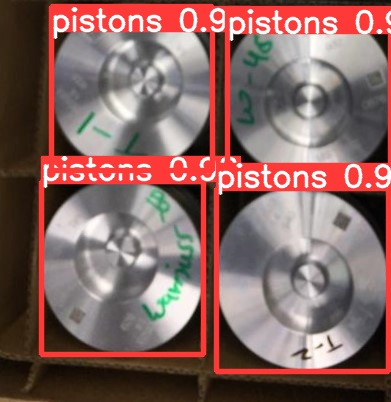

In [11]:
from IPython.display import Image, display

display(Image(filename=f'{HOME}/runs/detect/predict2/3.jpg', width=600))


In [12]:
model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')
results = model.predict(source='runs/detect/predict2/3.jpg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


##Finding coordinates of bounding box for the single image (Not required)

In [13]:
model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')
results = model.predict(source='3.jpg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


In [15]:
results[0].boxes.xyxy

tensor([[216., 188., 388., 371.],
        [227.,   8., 390., 182.],
        [ 51.,   6., 212., 170.],
        [ 41., 181., 203., 354.]], device='cuda:0')

In [16]:
print(results)

[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
type: <class 'torch.Tensor'>
shape: torch.Size([4, 6])
dtype: torch.float32
 + tensor([[216.00000, 188.00000, 388.00000, 371.00000,   0.98679,   0.00000],
        [227.00000,   8.00000, 390.00000, 182.00000,   0.98310,   0.00000],
        [ 51.00000,   6.00000, 212.00000, 170.00000,   0.98174,   0.00000],
        [ 41.00000, 181.00000, 203.00000, 354.00000,   0.97644,   0.00000]], device='cuda:0')]


In [14]:

import torch

# Assuming the results are stored in the 'results' variable


# Extract the bounding box coordinates
boxes = results[0].boxes.xyxy  # Assuming the first result and removing the batch dimension

# Iterate over the bounding boxes
for box in boxes:
    x_min, y_min, x_max, y_max = box.tolist()
    print(f"Bounding Box: ({x_min}, {y_min}), ({x_max}, {y_max})")


Bounding Box: (216.0, 188.0), (388.0, 371.0)
Bounding Box: (227.0, 8.0), (390.0, 182.0)
Bounding Box: (51.0, 6.0), (212.0, 170.0)
Bounding Box: (41.0, 181.0), (203.0, 354.0)


In [15]:
print(boxes)

tensor([[216., 188., 388., 371.],
        [227.,   8., 390., 182.],
        [ 51.,   6., 212., 170.],
        [ 41., 181., 203., 354.]], device='cuda:0')


In [16]:
print(len(boxes))

4


##Finding coordinates of bounding box for each image in input_images and cropping accordingly and further saving into output_images (can directly skip to this after uploading images into input_images)

In [8]:
#to store each cropped image in a new folder

import os
from PIL import Image

# Directory containing the input images
input_dir = "input_images"

# Create a directory for output images if it doesn't exist
output_dir = "output_images"
os.makedirs(output_dir, exist_ok=True)

# Iterate over each image file in the input directory
for filename in os.listdir(input_dir):
    # Check if the file is an image
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".JPG"):
        # Load the input image
        image_path = os.path.join(input_dir, filename)
        image = Image.open(image_path)

        model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')
        results = model.predict(source=image, conf=0.25)
        model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')
        results = model.predict(source=image, conf=0.25)

        boxes = results[0].boxes.xyxy  # Assuming the first result and removing the batch dimension
        size = len(boxes)
        # Iterate over the bounding boxes
        for box in boxes:
            x_min, y_min, x_max, y_max = box.tolist()

        # Create a folder for the cropped images of this input image
        cropped_folder = os.path.join(output_dir, filename.split(".")[0])
        os.makedirs(cropped_folder, exist_ok=True)

        # Loop over each bounding box
        for i in range(size):
            # Define the bounding box coordinates
            x_min, y_min, x_max, y_max = boxes[i]

            # Crop the image based on the bounding box coordinates
            cropped_image = image.crop((float(x_min), float(y_min), float(x_max), float(y_max)))

            # Generate a unique filename for the cropped image
            cropped_filename = f"cropped_image_{i}.jpg"
            cropped_image_path = os.path.join(cropped_folder, cropped_filename)

            # Save the cropped image to the output folder
            cropped_image.save(cropped_image_path)
            print(f"Image {i} saved successfully for {filename}!")

print("All images saved successfully!")


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0019.jpg!
Image 1 saved successfully for IMG-20230622-WA0019.jpg!
Image 2 saved successfully for IMG-20230622-WA0019.jpg!
Image 3 saved successfully for IMG-20230622-WA0019.jpg!
Image 4 saved successfully for IMG-20230622-WA0019.jpg!
Image 5 saved successfully for IMG-20230622-WA0019.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0023.jpg!
Image 1 saved successfully for IMG-20230622-WA0023.jpg!
Image 2 saved successfully for IMG-20230622-WA0023.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230322-WA0009.jpg!
Image 1 saved successfully for IMG-20230322-WA0009.jpg!
Image 2 saved successfully for IMG-20230322-WA0009.jpg!
Image 3 saved successfully for IMG-20230322-WA0009.jpg!
Image 4 saved successfully for IMG-20230322-WA0009.jpg!
Image 5 saved successfully for IMG-20230322-WA0009.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0018.jpg!
Image 1 saved successfully for IMG-20230622-WA0018.jpg!
Image 2 saved successfully for IMG-20230622-WA0018.jpg!
Image 3 saved successfully for IMG-20230622-WA0018.jpg!
Image 4 saved successfully for IMG-20230622-WA0018.jpg!
Image 5 saved successfully for IMG-20230622-WA0018.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230322-WA0010.jpg!
Image 1 saved successfully for IMG-20230322-WA0010.jpg!
Image 2 saved successfully for IMG-20230322-WA0010.jpg!
Image 3 saved successfully for IMG-20230322-WA0010.jpg!
Image 4 saved successfully for IMG-20230322-WA0010.jpg!
Image 5 saved successfully for IMG-20230322-WA0010.jpg!
Image 6 saved successfully for IMG-20230322-WA0010.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0011.jpg!
Image 1 saved successfully for IMG-20230622-WA0011.jpg!
Image 2 saved successfully for IMG-20230622-WA0011.jpg!
Image 3 saved successfully for IMG-20230622-WA0011.jpg!
Image 4 saved successfully for IMG-20230622-WA0011.jpg!
Image 5 saved successfully for IMG-20230622-WA0011.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for b.JPG!
Image 1 saved successfully for b.JPG!
Image 2 saved successfully for b.JPG!
Image 3 saved successfully for b.JPG!
Image 4 saved successfully for b.JPG!
Image 5 saved successfully for b.JPG!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0026.jpg!
Image 1 saved successfully for IMG-20230622-WA0026.jpg!
Image 2 saved successfully for IMG-20230622-WA0026.jpg!
Image 3 saved successfully for IMG-20230622-WA0026.jpg!
Image 4 saved successfully for IMG-20230622-WA0026.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0004.jpg!
Image 1 saved successfully for IMG-20230622-WA0004.jpg!
Image 2 saved successfully for IMG-20230622-WA0004.jpg!
Image 3 saved successfully for IMG-20230622-WA0004.jpg!
Image 4 saved successfully for IMG-20230622-WA0004.jpg!
Image 5 saved successfully for IMG-20230622-WA0004.jpg!
Image 6 saved successfully for IMG-20230622-WA0004.jpg!
Image 7 saved successfully for IMG-20230622-WA0004.jpg!
Image 8 saved successfully for IMG-20230622-WA0004.jpg!
Image 9 saved successfully for IMG-20230622-WA0004.jpg!
Image 10 saved successfully for IMG-20230622-WA0004.jpg!
Image 11 saved successfully for IMG-20230622-WA0004.jpg!
Image 12 saved successfully for IMG-20230622-WA0004.jpg!
Image 13 saved successfully for IMG-20230622-WA0004.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230322-WA0017.jpg!
Image 1 saved successfully for IMG-20230322-WA0017.jpg!
Image 2 saved successfully for IMG-20230322-WA0017.jpg!
Image 3 saved successfully for IMG-20230322-WA0017.jpg!
Image 4 saved successfully for IMG-20230322-WA0017.jpg!
Image 5 saved successfully for IMG-20230322-WA0017.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


Image 0 saved successfully for IMG-20230622-WA0012.jpg!
Image 1 saved successfully for IMG-20230622-WA0012.jpg!
Image 2 saved successfully for IMG-20230622-WA0012.jpg!
Image 3 saved successfully for IMG-20230622-WA0012.jpg!
Image 4 saved successfully for IMG-20230622-WA0012.jpg!
Image 5 saved successfully for IMG-20230622-WA0012.jpg!


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230322-WA0014.jpg!
Image 1 saved successfully for IMG-20230322-WA0014.jpg!
Image 2 saved successfully for IMG-20230322-WA0014.jpg!
Image 3 saved successfully for IMG-20230322-WA0014.jpg!
Image 4 saved successfully for IMG-20230322-WA0014.jpg!
Image 5 saved successfully for IMG-20230322-WA0014.jpg!
Image 6 saved successfully for IMG-20230322-WA0014.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230322-WA0012.jpg!
Image 1 saved successfully for IMG-20230322-WA0012.jpg!
Image 2 saved successfully for IMG-20230322-WA0012.jpg!
Image 3 saved successfully for IMG-20230322-WA0012.jpg!
Image 4 saved successfully for IMG-20230322-WA0012.jpg!
Image 5 saved successfully for IMG-20230322-WA0012.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0002.jpg!
Image 1 saved successfully for IMG-20230622-WA0002.jpg!
Image 2 saved successfully for IMG-20230622-WA0002.jpg!
Image 3 saved successfully for IMG-20230622-WA0002.jpg!
Image 4 saved successfully for IMG-20230622-WA0002.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0020.jpg!
Image 1 saved successfully for IMG-20230622-WA0020.jpg!
Image 2 saved successfully for IMG-20230622-WA0020.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0014.jpg!
Image 1 saved successfully for IMG-20230622-WA0014.jpg!
Image 2 saved successfully for IMG-20230622-WA0014.jpg!
Image 3 saved successfully for IMG-20230622-WA0014.jpg!
Image 4 saved successfully for IMG-20230622-WA0014.jpg!
Image 5 saved successfully for IMG-20230622-WA0014.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0016.jpg!
Image 1 saved successfully for IMG-20230622-WA0016.jpg!
Image 2 saved successfully for IMG-20230622-WA0016.jpg!
Image 3 saved successfully for IMG-20230622-WA0016.jpg!
Image 4 saved successfully for IMG-20230622-WA0016.jpg!
Image 5 saved successfully for IMG-20230622-WA0016.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0015.jpg!
Image 1 saved successfully for IMG-20230622-WA0015.jpg!
Image 2 saved successfully for IMG-20230622-WA0015.jpg!
Image 3 saved successfully for IMG-20230622-WA0015.jpg!
Image 4 saved successfully for IMG-20230622-WA0015.jpg!
Image 5 saved successfully for IMG-20230622-WA0015.jpg!
Image 6 saved successfully for IMG-20230622-WA0015.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230322-WA0011.jpg!
Image 1 saved successfully for IMG-20230322-WA0011.jpg!
Image 2 saved successfully for IMG-20230322-WA0011.jpg!
Image 3 saved successfully for IMG-20230322-WA0011.jpg!
Image 4 saved successfully for IMG-20230322-WA0011.jpg!
Image 5 saved successfully for IMG-20230322-WA0011.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0005.jpg!
Image 1 saved successfully for IMG-20230622-WA0005.jpg!
Image 2 saved successfully for IMG-20230622-WA0005.jpg!
Image 3 saved successfully for IMG-20230622-WA0005.jpg!
Image 4 saved successfully for IMG-20230622-WA0005.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


Image 0 saved successfully for IMG-20230322-WA0016.jpg!
Image 1 saved successfully for IMG-20230322-WA0016.jpg!
Image 2 saved successfully for IMG-20230322-WA0016.jpg!
Image 3 saved successfully for IMG-20230322-WA0016.jpg!
Image 4 saved successfully for IMG-20230322-WA0016.jpg!
Image 5 saved successfully for IMG-20230322-WA0016.jpg!
Image 6 saved successfully for IMG-20230322-WA0016.jpg!


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0009.jpg!
Image 1 saved successfully for IMG-20230622-WA0009.jpg!
Image 2 saved successfully for IMG-20230622-WA0009.jpg!
Image 3 saved successfully for IMG-20230622-WA0009.jpg!
Image 4 saved successfully for IMG-20230622-WA0009.jpg!
Image 5 saved successfully for IMG-20230622-WA0009.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0006.jpg!
Image 1 saved successfully for IMG-20230622-WA0006.jpg!
Image 2 saved successfully for IMG-20230622-WA0006.jpg!
Image 3 saved successfully for IMG-20230622-WA0006.jpg!
Image 4 saved successfully for IMG-20230622-WA0006.jpg!
Image 5 saved successfully for IMG-20230622-WA0006.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0028.jpg!
Image 1 saved successfully for IMG-20230622-WA0028.jpg!
Image 2 saved successfully for IMG-20230622-WA0028.jpg!
Image 3 saved successfully for IMG-20230622-WA0028.jpg!
Image 4 saved successfully for IMG-20230622-WA0028.jpg!
Image 5 saved successfully for IMG-20230622-WA0028.jpg!
Image 6 saved successfully for IMG-20230622-WA0028.jpg!
Image 7 saved successfully for IMG-20230622-WA0028.jpg!
Image 8 saved successfully for IMG-20230622-WA0028.jpg!
Image 9 saved successfully for IMG-20230622-WA0028.jpg!
Image 10 saved successfully for IMG-20230622-WA0028.jpg!
Image 11 saved successfully for IMG-20230622-WA0028.jpg!
Image 12 saved successfully for IMG-20230622-WA0028.jpg!
Image 13 saved successfully for IMG-20230622-WA0028.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for a.JPG!
Image 1 saved successfully for a.JPG!
Image 2 saved successfully for a.JPG!
Image 3 saved successfully for a.JPG!
Image 4 saved successfully for a.JPG!
Image 5 saved successfully for a.JPG!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0013.jpg!
Image 1 saved successfully for IMG-20230622-WA0013.jpg!
Image 2 saved successfully for IMG-20230622-WA0013.jpg!
Image 3 saved successfully for IMG-20230622-WA0013.jpg!
Image 4 saved successfully for IMG-20230622-WA0013.jpg!
Image 5 saved successfully for IMG-20230622-WA0013.jpg!
Image 6 saved successfully for IMG-20230622-WA0013.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for WhatsApp Image 2023-03-18 at 10.53.13.jpg!
Image 1 saved successfully for WhatsApp Image 2023-03-18 at 10.53.13.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0024.jpg!
Image 1 saved successfully for IMG-20230622-WA0024.jpg!
Image 2 saved successfully for IMG-20230622-WA0024.jpg!
Image 3 saved successfully for IMG-20230622-WA0024.jpg!
Image 4 saved successfully for IMG-20230622-WA0024.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0003.jpg!
Image 1 saved successfully for IMG-20230622-WA0003.jpg!
Image 2 saved successfully for IMG-20230622-WA0003.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0017.jpg!
Image 1 saved successfully for IMG-20230622-WA0017.jpg!
Image 2 saved successfully for IMG-20230622-WA0017.jpg!
Image 3 saved successfully for IMG-20230622-WA0017.jpg!
Image 4 saved successfully for IMG-20230622-WA0017.jpg!
Image 5 saved successfully for IMG-20230622-WA0017.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0022.jpg!
Image 1 saved successfully for IMG-20230622-WA0022.jpg!
Image 2 saved successfully for IMG-20230622-WA0022.jpg!
Image 3 saved successfully for IMG-20230622-WA0022.jpg!
Image 4 saved successfully for IMG-20230622-WA0022.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0027.jpg!
Image 1 saved successfully for IMG-20230622-WA0027.jpg!
Image 2 saved successfully for IMG-20230622-WA0027.jpg!
Image 3 saved successfully for IMG-20230622-WA0027.jpg!
Image 4 saved successfully for IMG-20230622-WA0027.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0021.jpg!
Image 1 saved successfully for IMG-20230622-WA0021.jpg!
Image 2 saved successfully for IMG-20230622-WA0021.jpg!
Image 3 saved successfully for IMG-20230622-WA0021.jpg!
Image 4 saved successfully for IMG-20230622-WA0021.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230322-WA0013.jpg!
Image 1 saved successfully for IMG-20230322-WA0013.jpg!
Image 2 saved successfully for IMG-20230322-WA0013.jpg!
Image 3 saved successfully for IMG-20230322-WA0013.jpg!
Image 4 saved successfully for IMG-20230322-WA0013.jpg!
Image 5 saved successfully for IMG-20230322-WA0013.jpg!
Image 6 saved successfully for IMG-20230322-WA0013.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Image 0 saved successfully for IMG-20230622-WA0025.jpg!
Image 1 saved successfully for IMG-20230622-WA0025.jpg!
Image 2 saved successfully for IMG-20230622-WA0025.jpg!
Image 3 saved successfully for IMG-20230622-WA0025.jpg!
Image 4 saved successfully for IMG-20230622-WA0025.jpg!
Image 5 saved successfully for IMG-20230622-WA0025.jpg!
Image 6 saved successfully for IMG-20230622-WA0025.jpg!
Image 7 saved successfully for IMG-20230622-WA0025.jpg!
Image 8 saved successfully for IMG-20230622-WA0025.jpg!
Image 9 saved successfully for IMG-20230622-WA0025.jpg!
Image 10 saved successfully for IMG-20230622-WA0025.jpg!
Image 11 saved successfully for IMG-20230622-WA0025.jpg!
Image 12 saved successfully for IMG-20230622-WA0025.jpg!
Image 13 saved successfully for IMG-20230622-WA0025.jpg!


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


Image 0 saved successfully for IMG-20230322-WA0015.jpg!
Image 1 saved successfully for IMG-20230322-WA0015.jpg!
Image 2 saved successfully for IMG-20230322-WA0015.jpg!
Image 3 saved successfully for IMG-20230322-WA0015.jpg!
Image 4 saved successfully for IMG-20230322-WA0015.jpg!
Image 5 saved successfully for IMG-20230322-WA0015.jpg!
All images saved successfully!


##Checking the cropped images for a picture

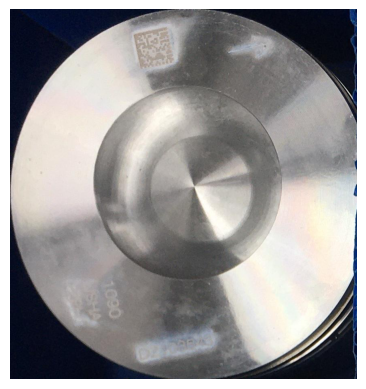

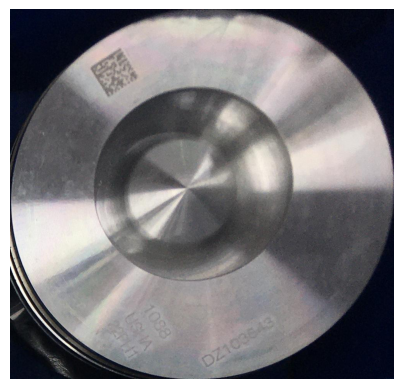

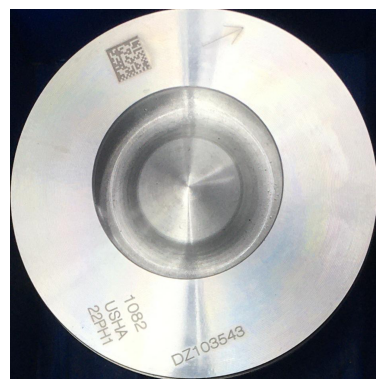

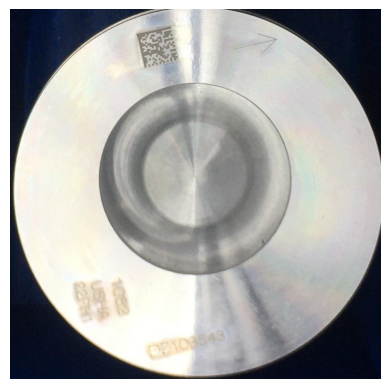

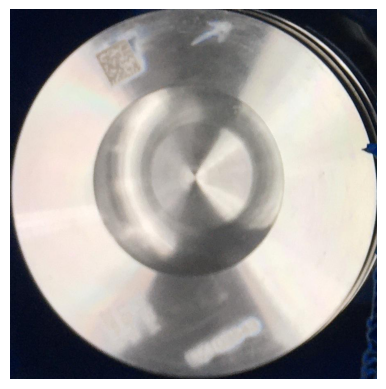

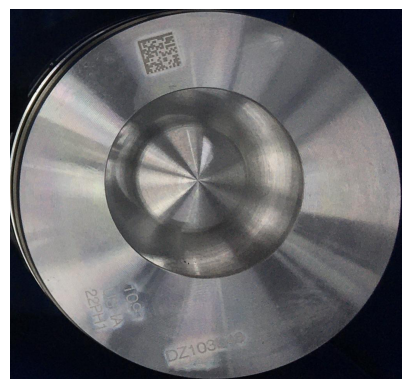

In [11]:
import os
import matplotlib.pyplot as plt

# Directory path
folder_path = "/content/output_images/a"

# Get the list of files in the folder
file_list = os.listdir(folder_path)

# Iterate over each file in the folder
for filename in file_list:
    # Check if the file is an image
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load and display the image
        image_path = os.path.join(folder_path, filename)
        image = plt.imread(image_path)

        plt.imshow(image)
        plt.axis('off')  # Optional: Remove axes
        plt.show()

##Checking if number of files in input_images is same as number of folders in output_images

In [9]:
import os

# Path to the file
folder_path = 'output_images'

file_list = os.listdir(folder_path)

# Count the number of files
num_files = len(file_list)

print(f"Number of files in the folder: {num_files}")

Number of files in the folder: 36


In [13]:
import os

# Path to the file
folder_path = 'input_images'

file_list = os.listdir(folder_path)

# Count the number of files
num_files = len(file_list)

print(f"Number of files in the folder: {num_files}")

Number of files in the folder: 36


##Downloading Output files

In [14]:
import shutil
import zipfile

# Specify the path of the folder to be downloaded
folder_path = '/content/output_images'

# Specify the target path for the ZIP file
zip_file_path = '/content/output_images.zip'

# Create a ZIP file of the folder
shutil.make_archive('/content/output_images', 'zip', folder_path)

# Rename the ZIP file to the desired name
shutil.move('/content/output_images.zip', zip_file_path)

# Download the ZIP file
from google.colab import files
files.download(zip_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>